# Notebook Imports and Packages

In [187]:
import matplotlib.pyplot as plt
import numpy as np
import math

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #color maps

from sympy import symbols, diff

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Exapmle 1 - simple cost function
### $$f(x) = x^2 + x + 1$$

In [188]:
def f(x):
    return x**2+x+1

In [189]:
def df(x):
    return 2*x+1

In [190]:
x_1 = np.linspace(start=-3, stop=3, num=100)

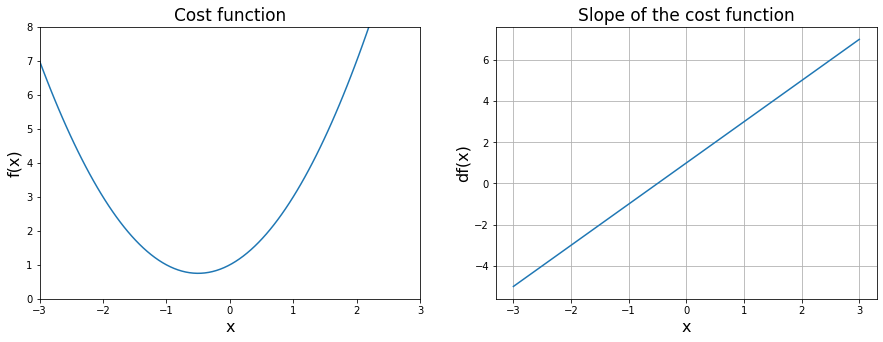

In [191]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)

plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.xlim([-3,3])
plt.ylim(0,8)

plt.plot(x_1, f(x_1))

plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_1, df(x_1))
plt.grid()

plt.show()

## Python Loops & Gradient Descent

In [192]:
for n in range(5):
    print('Hello world', n)
print('End of Loop')

Hello world 0
Hello world 1
Hello world 2
Hello world 3
Hello world 4
End of Loop


In [193]:
i = 0
while i < 7:
    print('Counting ...', i)
    i = i + 1
print('End of while loop')

Counting ... 0
Counting ... 1
Counting ... 2
Counting ... 3
Counting ... 4
Counting ... 5
Counting ... 6
End of while loop


In [194]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multipler = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multipler * gradient
    
    step_size = abs(new_x - previous_x)
    #print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times', n)
        break

print('Local minimum occurs at: ', new_x)
print('Slope of df(x) is: ', df(new_x))
print('Cost Function f(x) at the point is :', f(new_x))

Loop ran this many times 50
Local minimum occurs at:  -0.49996003706460423
Slope of df(x) is:  7.992587079153068e-05
Cost Function f(x) at the point is : 0.7500000015970362


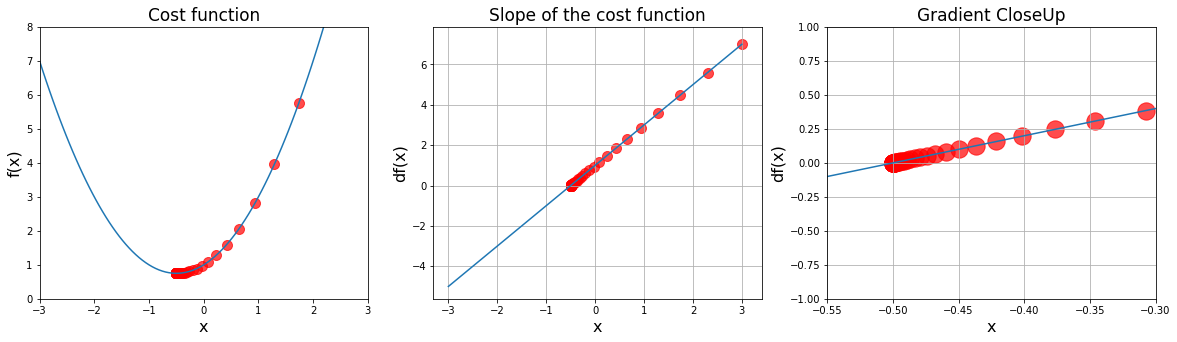

In [195]:
#Superimpose granient 
plt.figure(figsize=[20,5])

plt.subplot(1,3,1)

plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.xlim([-3,3])
plt.ylim(0,8)

plt.plot(x_1, f(x_1))

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s = 100, alpha = 0.7)


plt.subplot(1,3,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_1, df(x_1))
plt.scatter(x_list, slope_list, color='red', s = 100, alpha = 0.7)
plt.grid()

plt.subplot(1,3,3)
plt.title('Gradient CloseUp', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.xlim([-0.55,-0.3])
plt.ylim(-1,1)

plt.plot(x_1, df(x_1))
plt.scatter(x_list, slope_list, color='red', s = 300, alpha = 0.7)
plt.grid()


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Function
## $$g(x)=x^4-4x^2+5$$

In [196]:
x_2 = np.linspace(-2,2,1000)

In [197]:
def g(x):
    return x**4-4*x**2+5

In [198]:
def dg(x):
    return 4*x**3-8*x

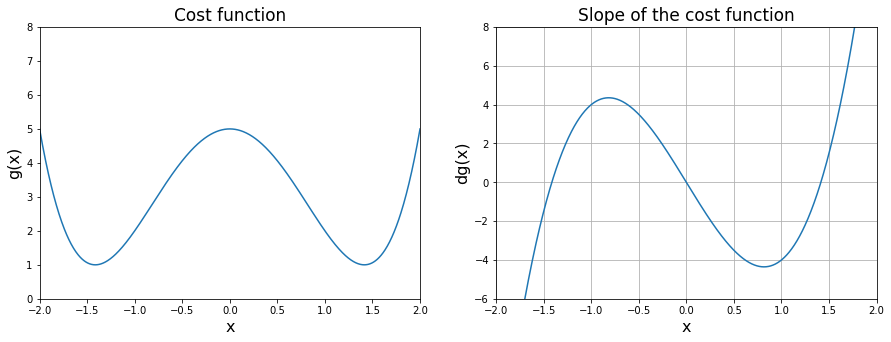

In [199]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)

plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.xlim(-2,2)
plt.ylim(0,8)

plt.plot(x_2, g(x_2))

plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.xlim(-2,2)
plt.ylim(-6,8)


plt.plot(x_2, dg(x_2))
plt.grid()

plt.show()

## Gradient Descent as a Python Function

In [200]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list


In [201]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local minimum occurs at: ', local_min)
print('Number of steps: ', len(list_x))
print('Slope of df(x) is: ', dg(local_min))
print('Cost Function f(x) at the point is :', g(local_min))

Local minimum occurs at:  1.4122375085019094
Number of steps:  23
Slope of df(x) is:  -0.03155062633818417
Cost Function f(x) at the point is : 1.00003119467776


In [202]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, 
                                                 multiplier=0.01, precision=0.0001)
print('Local minimum occurs at: ', local_min)
print('Number of steps: ', len(list_x))
print('Slope of df(x) is: ', dg(local_min))
print('Cost Function f(x) at the point is :', g(local_min))

Local minimum occurs at:  -1.4137636556157256
Number of steps:  56
Slope of df(x) is:  0.007195073367222804
Cost Function f(x) at the point is : 1.0000016188136027


In [203]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print('Local minimum occurs at: ', local_min)
print('Number of steps: ', len(list_x))
print('Slope of df(x) is: ', dg(local_min))
print('Cost Function f(x) at the point is :', g(local_min))

Local minimum occurs at:  -1.4120887490901561
Number of steps:  34
Slope of df(x) is:  0.03392043166866365
Cost Function f(x) at the point is : 1.000036064405096


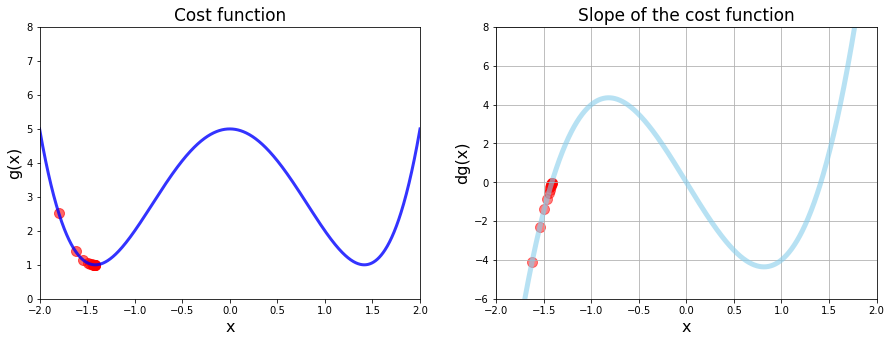

In [204]:
#calling grad
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-1.8)

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)

plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.xlim(-2,2)
plt.ylim(0,8)

plt.plot(x_2, g(x_2), color = 'blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color = 'red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color = 'red', s=100, alpha=0.5)

plt.grid()
plt.show()

# Example 3 - Divergence, Overflow and Python Tuples
## $$h(x)=x^5-2x^4+2$$

In [205]:
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5-2*x**4+2

def dh(x):
    return 5*x**4-8*x**3


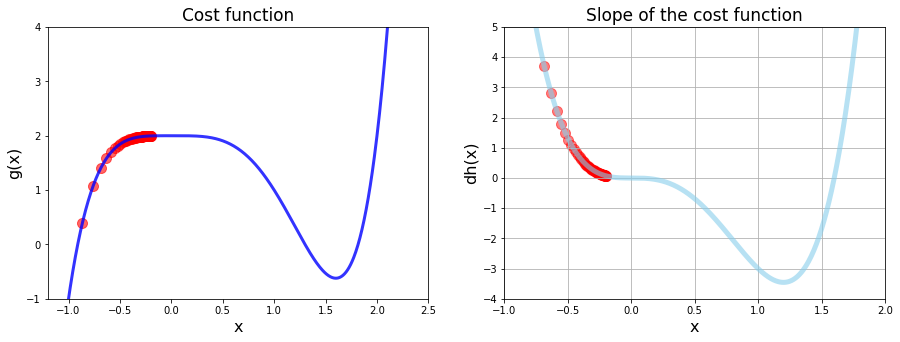

Local minimum occurs at:  -1.8398461123332792e+24
Slope of df(x) is:  5.729226632843199e+97
Cost Function f(x) at the point is : -2.1081790694225687e+121
Number of steps:  72


In [206]:
#calling grad
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter=71)

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)

plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)

plt.plot(x_3, h(x_3), color = 'blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color = 'red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.xlim(-1,2)
plt.ylim(-4,5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color = 'red', s=100, alpha=0.5)

plt.grid()
plt.show()

print('Local minimum occurs at: ', local_min)
print('Slope of df(x) is: ', dh(local_min))
print('Cost Function f(x) at the point is :', h(local_min))
print('Number of steps: ', len(list_x))

In [207]:
import sys
#help(sys)
#sys.version
sys.float_info.max

1.7976931348623157e+308

# Python Tuples

In [208]:
# crating a tuple - tuple packing
breakfast = 'bacon', 'eggs', 'avacado'
unlucky_numbers = 13, 4, 9, 26, 17

#how to access a value
print('I looove', breakfast[0])
print('My hotel has no '+str(unlucky_numbers[1])+' th floor')

not_my_adress = 1, 'Zapcity', 'Borodok', 69121

tuple_single = 43,

main, side, greens = breakfast
print('Main course is',main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local minimum occurs at: ', data_tuple[0])
print('Slope of df(x) is: ', dh(data_tuple[0]))
print('Cost Function f(x) at the point is :', h(data_tuple[0]))
print('Number of steps: ', len(data_tuple[1]))

I looove bacon
My hotel has no 4 th floor
Main course is bacon
Local minimum occurs at:  1.5989534547394717
Slope of df(x) is:  -0.021391216571167604
Cost Function f(x) at the point is : -0.6214287992331258
Number of steps:  117


# The Learning Rate

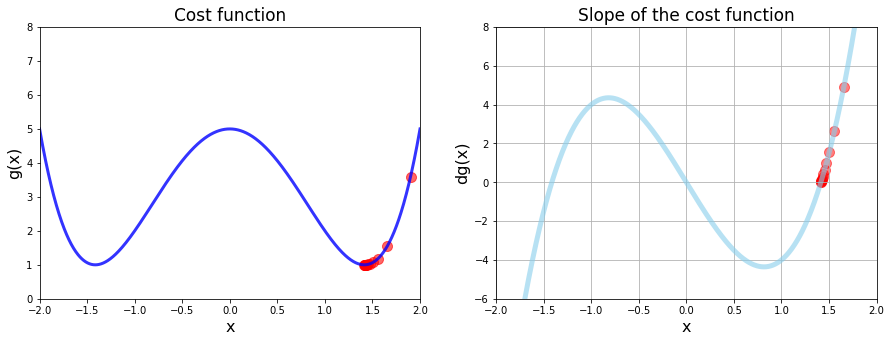

Number of steps:  14


In [209]:
#calling grad
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.02, max_iter=500)

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)

plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.xlim(-2,2)
plt.ylim(0,8)

plt.plot(x_2, g(x_2), color = 'blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color = 'red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color = 'red', s=100, alpha=0.5)

plt.grid()
plt.show()
print('Number of steps: ', len(list_x))

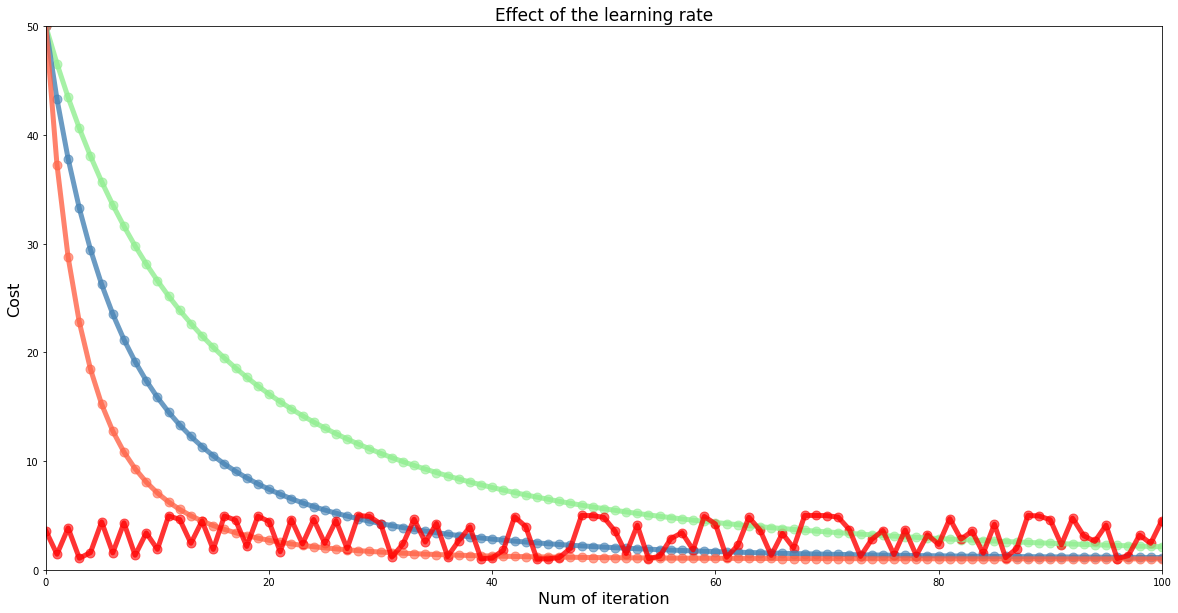

In [210]:
#Run Gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, 
                                                 multiplier=0.0005, precision=0.0001, max_iter=n)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, 
                                                 multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, 
                                                 multiplier=0.002, precision=0.0001, max_iter=n)
# Experiment

insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, 
                                                 multiplier=0.25, precision=0.0001, max_iter=n)


#Plotting reduction in cost for each iteration
plt.figure(figsize=[20,10])

plt.xlim(0,n)
plt.ylim(0,50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Num of iteration', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values of our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
insane_values = np.array(insane_gamma[1])


# 2) X axes Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

#Plotting low learning Rate
plt.plot(iteration_list, g(low_values), color = 'lightgreen', linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(low_values), color = 'lightgreen', s=80, alpha=0.6)

#Plotting Mid learning Rate
plt.plot(iteration_list, g(mid_values), color = 'steelblue', linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(mid_values), color = 'steelblue', s=80, alpha=0.6)

#Plotting High learning Rate
plt.plot(iteration_list, g(high_values), color = 'tomato', linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(high_values), color = 'tomato', s=80, alpha=0.6)

#Plotting Insane learning Rate
plt.plot(iteration_list, g(insane_values), color = 'red', linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(insane_values), color = 'red', s=80, alpha=0.6)

plt.show()

# Example 4 - Darta Viz and 3d charts
## Minimize $$f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$$

Minimise $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2-y^2}$

In [211]:
def f(x,y):
    r = 3**(-x**2-y**2)
    return 1/(r+1)

In [212]:
# Make our x and y data

x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Shape of X array', x_4.shape)

Shape of X array (200,)
Shape of X array (200, 200)


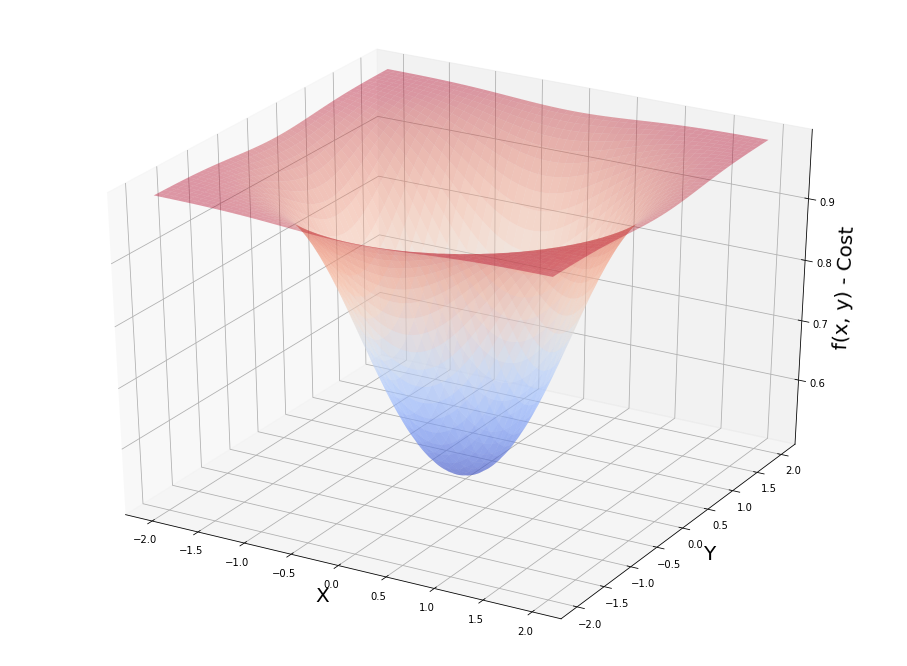

In [213]:
# Generating 3D plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

## Partial Derivaties & Symbolic Computition

In [214]:
a, b = symbols('x, y')
print('Our cost function is: ', f(a, b))
print('Partial derivative wrt x  is: ', diff(f(a,b), a))
print('Value of f(x,y) at x=1.8 y = 1.0 is: ',
      f(a, b).evalf(subs={a:1.8, b:1.0}))
print('Value of slope to axis X at x=1.8 y = 1.0 is: ',
      diff(f(a,b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x  is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y = 1.0 is:  0.990604794032582
Value of slope to axis X at x=1.8 y = 1.0 is:  0.0368089716197505


# Batch Gradient Descent with SymPy

In [215]:
#setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x =  diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y =  diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients
    
#result
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [216]:
def fpx(x,y):
    return (2*3**(-x**2 - y**2)*x*math.log(3))/((3**(-x**2 - y**2) + 1)**2)

def fpy(x,y):
    return (2*3**(-x**2 - y**2)*y*math.log(3))/((3**(-x**2 - y**2) + 1)**2)


In [217]:
#setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x =  fpx(params[0], params[1])
    gradient_y =  fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients
    
#result
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [218]:
#setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1,2)

for n in range(max_iter):
    gradient_x =  fpx(params[0], params[1])
    gradient_y =  fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients
    values_array = np.append(values_array, params.reshape(1,2), axis=0)
    
#result
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


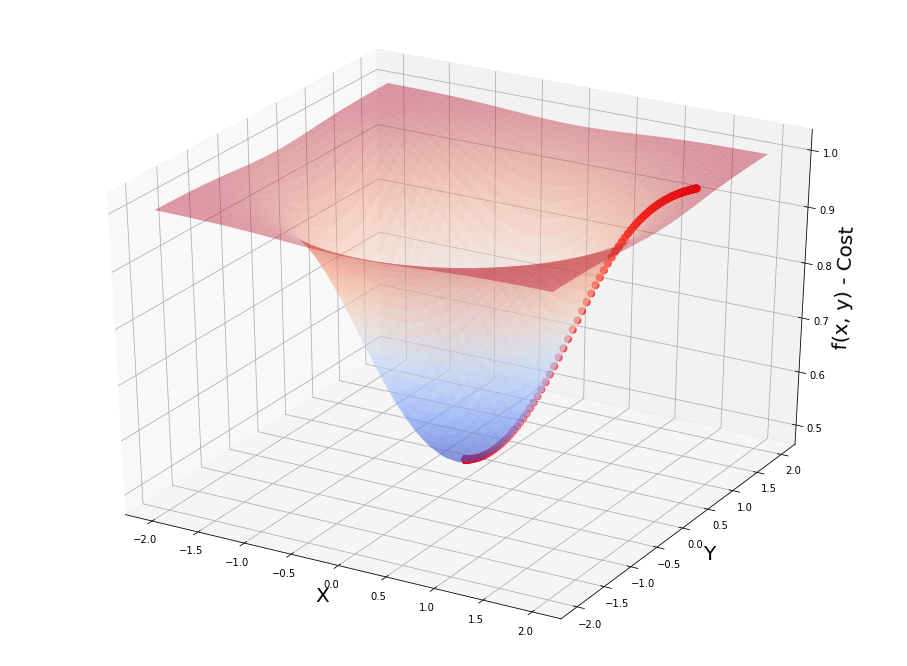

In [219]:
# Generating 3D plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:,1], f(values_array[:, 0], 
                                                    values_array[:,1]), s=50, color='red')

plt.show()

In [220]:
# Advanced Numpy Array Practice:

kirk = np.array([['Capitan', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)
print('hs_band[0]    :', hs_band[0])
print('hs_band[0][1] :', hs_band[0][1])
print('hs_band[1][0] :', hs_band[1][0])

#the_roots = np.append(arr=hs_band, values=kirk.reshape(2,1), axis=1)
the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

print('Printing nicknames...', the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles...', the_roots[:, 1])


(1, 2)
(2, 2)
hs_band[0]    : ['Black Thought' 'MC']
hs_band[0][1] : MC
hs_band[1][0] : Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Capitan' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Capitan']
Printing band roles... ['MC' 'Drums' 'Guitar' 'MC']


# Example 5 - Working with data & Real Cost Function
## Mean Squared Error: a cost function for regression problems
### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}\big)^2$$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}\big)^2$$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat y\big)^2$$

In [221]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [222]:
# Quick linear regression

regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


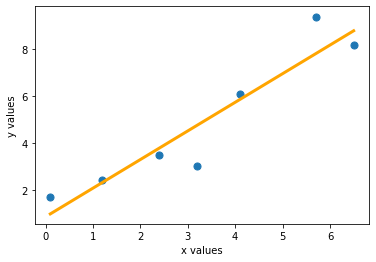

In [223]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [224]:
y_hat = 0.8475351486029536 + 1.2227264637835915*x_5
print('Est values y_hat are: \n', y_hat)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]


In [225]:
def mse(y, y_hat):
    #print('Est values y_hat are: \n', y_hat)
    return 1/(len(y))*sum((y-y_hat)**2)

In [226]:
print('My MSE function is:',mse(y_5, y_hat))
print('MSE regression using manual calc is: ',mean_squared_error(y_5, y_hat))
print('MSE regression is: ',mean_squared_error(y_5, regr.predict(x_5)))

My MSE function is: [0.94796558]
MSE regression using manual calc is:  0.9479655759794577
MSE regression is:  0.9479655759794577


## 3D Plot for the MSE Cost Function
### Make data for thetas

In [227]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

### Calc MSE using nested for loops

In [228]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)
print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [229]:
for i in range(3):
    for j in range(3):
        print(f'This is dif way, value of i is: {i} and value of j is : {j}')

This is dif way, value of i is: 0 and value of j is : 0
This is dif way, value of i is: 0 and value of j is : 1
This is dif way, value of i is: 0 and value of j is : 2
This is dif way, value of i is: 1 and value of j is : 0
This is dif way, value of i is: 1 and value of j is : 1
This is dif way, value of i is: 1 and value of j is : 2
This is dif way, value of i is: 2 and value of j is : 0
This is dif way, value of i is: 2 and value of j is : 1
This is dif way, value of i is: 2 and value of j is : 2


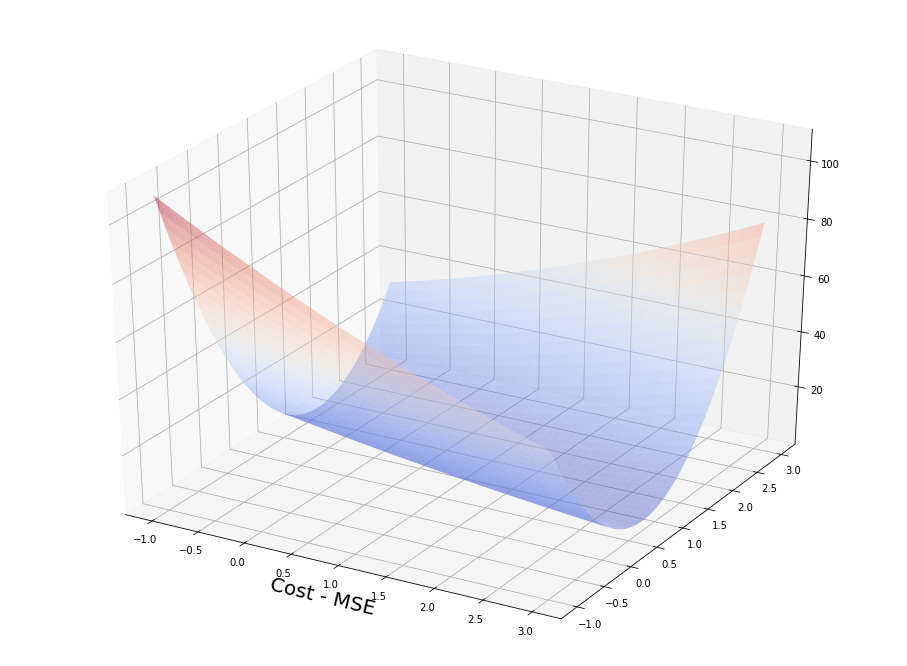

In [230]:
#ploting MSE
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_xlabel('Theta 1', fontsize=20)
ax.set_xlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.coolwarm, alpha=0.4)
plt.show()

In [234]:
print('Min value of plot', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j): ', ij_min)
print('Min MSE for theta 0 at plot_t0[111][91]): ', plot_t0[111][91])
print('Min MSE for theta 1 at plot_t1[111][91]): ', plot_t1[111][91])

Min value of plot 0.9483826526747163
Min occurs at (i,j):  (111, 91)
Min MSE for theta 0 at plot_t0[111][91]):  0.829145728643216
Min MSE for theta 1 at plot_t1[111][91]):  1.2311557788944723


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$
## $$\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$
## $$\frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^{n}
\big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [236]:
def grad(x, y, thetas):
    n = y.size
    
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [240]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

#collect data
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0]+thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    #append
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values = mse(y_5, thetas[0]+thetas[1]*x_5))
    
    
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0]+thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


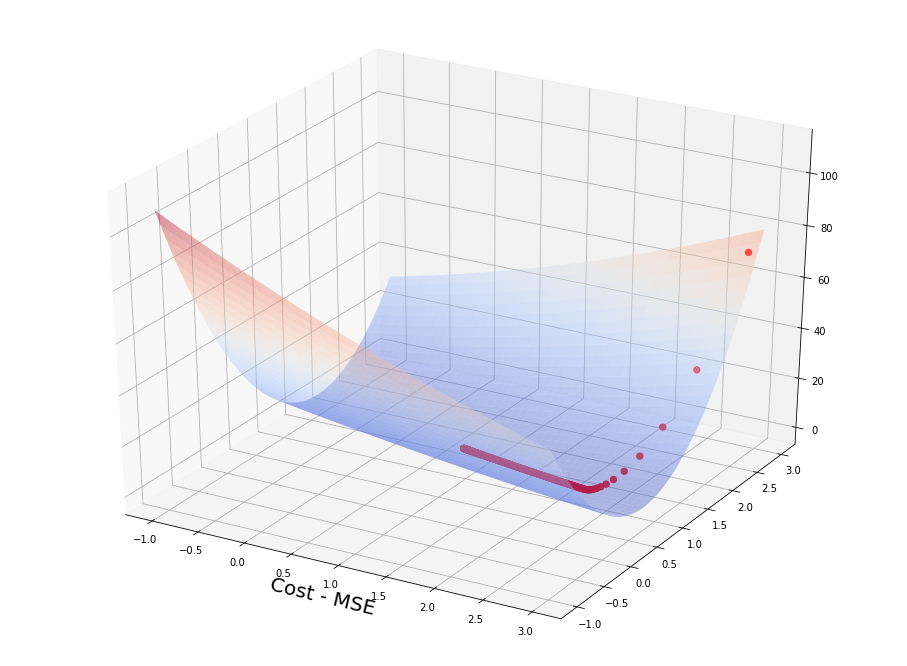

In [242]:
#ploting MSE
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_xlabel('Theta 1', fontsize=20)
ax.set_xlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=40, color='red')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.coolwarm, alpha=0.4)
plt.show()